# IMPORT LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")
import string
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from prettytable import PrettyTable  

# IMPORT DATASET

In [2]:
rev_ds = pd.read_csv('IMDB Dataset.csv')
rev_ds

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#### DROPPING DUPLICATE ENTRIES

In [3]:
rev_ds.drop_duplicates(subset ='review',keep = False, inplace = True)
rev_ds

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Exploring dataset

In [4]:
rev_ds.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
rev_ds.tail(10)

,review,sentiment
49989,I got this one a few weeks ago and love it! It...,positive
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
rev_ds.describe()

,review,sentiment
count,49176,49176
unique,49176,2
top,"This final installment of the ""Airport"" franch...",positive
freq,1,24774


In [7]:
rev_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49176 entries, 0 to 49999
Data columns (total 2 columns):
review       49176 non-null object
sentiment    49176 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


# DATASET VISUALISATION

In [8]:
# Let's get the length of the reviews
rev_ds['length'] = rev_ds['review'].apply(len)

In [9]:
rev_ds

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


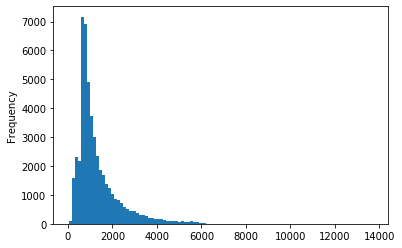

In [10]:
rev_ds['length'].plot(bins=100, kind='hist')

In [11]:
rev_ds.length.describe()

count    49176.000000
mean      1311.635574
std        991.718130
min         32.000000
25%        700.000000
50%        972.000000
75%       1593.000000
max      13704.000000
Name: length, dtype: float64

In [12]:
# Let's see the longest message 13704
rev_ds[rev_ds['length'] == 13704]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

### Separating positive and negative reviews

In [13]:
 positve = rev_ds[rev_ds['sentiment']=='positive']
 positve   

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
5,"Probably my all-time favorite movie, a story o...",positive,656
...,...,...,...
49983,"I loved it, having been a fan of the original ...",positive,695
49985,Imaginary Heroes is clearly the best film of t...,positive,1168
49989,I got this one a few weeks ago and love it! It...,positive,967
49992,John Garfield plays a Marine who is blinded by...,positive,968


In [14]:
 negatve = rev_ds[rev_ds['sentiment']=='negative']
 negatve   

,review,sentiment,length
3,Basically there's a family where a little boy ...,negative,748
7,"This show was an amazing, fresh & innovative i...",negative,934
8,Encouraged by the positive comments about this...,negative,681
10,Phil the Alien is one of those quirky films wh...,negative,578
11,I saw this movie when I was about 12 when it c...,negative,937
...,...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative,759
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


In [15]:
print('Positive percentage',(len(positve)/len(rev_ds))*100)

Positive percentage 50.37823328452904


In [16]:
print('Negative percentage',(len(negatve)/len(rev_ds))*100)

Negative percentage 49.62176671547096


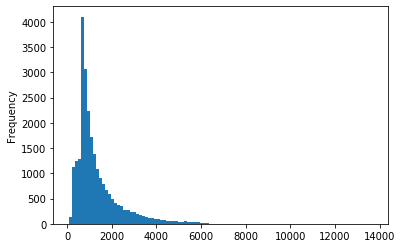

In [17]:
positve['length'].plot(bins=100, kind='hist') 

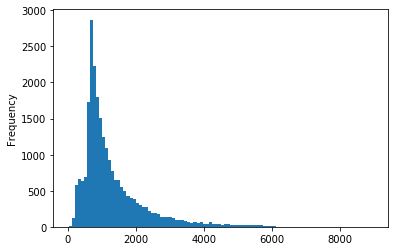

In [18]:
negatve['length'].plot(bins=100, kind='hist') 

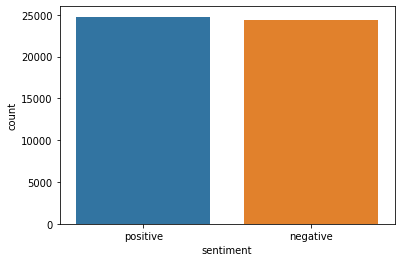

In [19]:
sns.countplot(rev_ds['sentiment'], label = 'Count positve vs negatve')

# DATA CLEANING

### Removing redundant html

In [20]:
def removeHtml(review):
    sp = BeautifulSoup(review,'lxml')
    sp_f = sp.get_text()
    return sp_f

In [21]:
rev_ds['review'] = rev_ds['review'].apply(removeHtml)

In [22]:
rev_ds['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Removing punctuation

In [23]:
def removePunct(review):
    filter_punc = "".join([c for c in review if c not in string.punctuation])
    return filter_punc

In [24]:
rev_ds['review'] = rev_ds['review'].apply(removePunct)
rev_ds['review'][0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictur

### Tokenize

In [25]:
tokenizer = RegexpTokenizer('[A-Za-z]\w+')
rev_ds['review'] = rev_ds['review'].apply(lambda x : tokenizer.tokenize(x.lower()))
rev_ds['review'][0]

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'oz',
 'episode',
 'youll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'methe',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'wordit',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 'mainly',
 'on',
 'emerald',
 'city',
 '

### Filter stopwords

In [26]:
def removeStopwords(review): 
    sw_f = [w for w in review if w not in stopwords.words('english')]
    return sw_f

In [27]:
rev_ds['review'] = rev_ds['review'].apply(removeStopwords)
rev_ds['review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',


### Lemmatizing

In [28]:
lemmatizer = WordNetLemmatizer()
def Lemmatizing(text):
    lemmatized = [lemmatizer.lemmatize(i) for i in text]
    return lemmatized

In [29]:
rev_ds['review'] = rev_ds['review'].apply(lambda x : Lemmatizing(x))

In [30]:
rev_ds['review'][0]

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'moreso',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show',
 'wo

### Stemming

In [31]:
stemmer = PorterStemmer()

def stemming(text):
    st_f = " ".join([stemmer.stem(i) for i in text])
    return st_f

In [32]:
rev_ds['review'] = rev_ds['review'].apply(lambda x : stemming(x))

In [33]:
rev_ds['review'][0]

'one review mention watch oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focu mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfo

# VECTORIZATION

In [34]:
vect = CountVectorizer(ngram_range=(1,2))
posneg_countvectorizer = vect.fit_transform(rev_ds['review'])

In [35]:
posneg_countvectorizer.shape

(49176, 2944092)

# MODEL TRAINING AND EVALUATION

In [36]:
label = rev_ds['sentiment'].values
label

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [37]:
x = posneg_countvectorizer
y = label

In [38]:
x.shape

(49176, 2944092)

In [39]:
y.shape

(49176,)

### Create Testing And Training Dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 4)

In [41]:
X_train.shape

(39340, 2944092)

In [42]:
X_test.shape

(9836, 2944092)

###  Fitting Training Dataset

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluation of Testing Dataset

In [45]:
logisticmodel_prediction = logreg.predict(X_test)
cm = confusion_matrix(y_test,logisticmodel_prediction)
cm

array([[4335,  536],
       [ 452, 4513]])

In [46]:
print(classification_report(y_test, logisticmodel_prediction))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4871
    positive       0.89      0.91      0.90      4965

    accuracy                           0.90      9836
   macro avg       0.90      0.90      0.90      9836
weighted avg       0.90      0.90      0.90      9836



In [47]:
NB_prediction = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,NB_prediction)
cm

array([[4362,  509],
       [ 640, 4325]])

In [48]:
print(classification_report(y_test, NB_prediction))

              precision    recall  f1-score   support

    negative       0.87      0.90      0.88      4871
    positive       0.89      0.87      0.88      4965

    accuracy                           0.88      9836
   macro avg       0.88      0.88      0.88      9836
weighted avg       0.88      0.88      0.88      9836



In [51]:
dtree_m = DecisionTreeClassifier(max_depth = 50).fit(X_train, y_train) 
dtree_prediction = dtree_m.predict(X_test) 
cm = confusion_matrix(y_test,dtree_prediction)
cm

array([[3538, 1333],
       [1288, 3677]])

In [52]:
print(classification_report(y_test, dtree_prediction))

              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      4871
    positive       0.73      0.74      0.74      4965

    accuracy                           0.73      9836
   macro avg       0.73      0.73      0.73      9836
weighted avg       0.73      0.73      0.73      9836



### Result

In [55]:
tb = PrettyTable()
tb.field_names = ["Test Size","Model","Accuracy","Total TP+TN"]
tb.add_row(['9836','Naive Bayes','88','8848'])
tb.add_row(['9836','Logistic Model','90','8687'])
tb.add_row(['9836','DecisionTree','73','7215'])

print(table)

+-----------+----------------+----------+-------------+
| Test Size |     Model      | Accuracy | Total TP+TN |
+-----------+----------------+----------+-------------+
|    9836   |  Naive Bayes   |    88    |     8848    |
|    9836   | Logistic Model |    90    |     8687    |
|    9836   |  DecisionTree  |    73    |     7215    |
+-----------+----------------+----------+-------------+
